In [13]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as T
import clip
# from transformers import CLIPProcessor, CLIPModel
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
cuda_device_id = 3
torch.cuda.set_device(3)
torch.cuda.get_device_name(3)

'Tesla P40'

In [ ]:
torch.cuda.empty_cache()
gc.collect()

In [15]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [16]:
# model = torch.load('/mnt/nis_lab_research/data/clip_data/pth/far_shah_b1-b5_b8_train_neg_ep30/model_final.pth')
model = clip.load('RN50')[0]
device = torch.device(f"cuda:{cuda_device_id}")
# device = "cpu"
model = model.to(device)
model.eval()
preprocess = clip.load("RN50", device=device, jit=False)[1]
# processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')


In [17]:
def run_clip_inference(image_tensor, context_tensor, label_tensor):

    # Move tensors to the same device as the model
    image_tensor = image_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_tensor)
        label_features = model.encode_text(label_tensor)
          
    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    label_features /= label_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ label_features.T).softmax(dim=-1)
    values_5, indices_5 = similarity[0].topk(5)
    values_1, indices_1 = similarity[0].topk(1)

    # Print the result
    print("\nTop predictions:\n")
    for value, index in zip(values_5, indices_5):
        print(f"{labels[index]:>16s}: {100 * value.item():.2f}%")
        
    return labels[indices_1[0]]



In [18]:
label_dir = "/mnt/nis_lab_research/data/clip_data/far_shah_b1-b5_b8_train_neg"
doi = "/home/pyt_user/pp/pytorch/clip/test_img_text"

In [19]:
labels = os.listdir(label_dir)

/home/pyt_user/pp/pytorch/clip/test_img_text/0Avcj1ZVYVRNUt9X-bactrim_ss-41595.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0Avcj1ZVYVRNUt9X-bactrim_ss-41595.txt


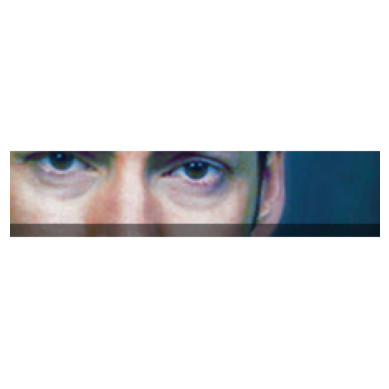


Top predictions:

   Image Captcha: 34.99%
    Text Captcha: 13.92%
   Click Captcha: 7.81%
Not Webpage Element: 7.57%
   Search Button: 3.74%

Label: Image Captcha

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0E46lx2BKAyF5UjY-cfma_ss-59975.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0E46lx2BKAyF5UjY-cfma_ss-59975.txt


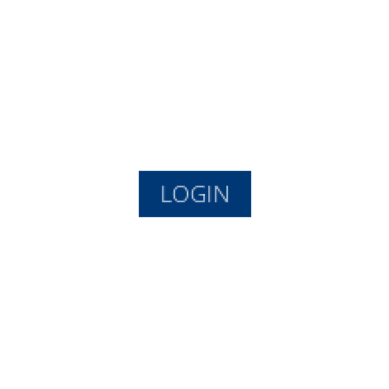


Top predictions:

    Login Button: 96.73%
    Close Button: 1.01%
   Accept Button: 0.28%
   Search Button: 0.27%
   Toggle Button: 0.21%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0E46lx2BKAyF5UjY-cfma_ss-59976.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0E46lx2BKAyF5UjY-cfma_ss-59976.txt


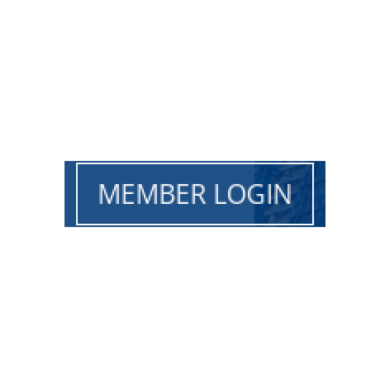


Top predictions:

    Login Button: 97.85%
Not Webpage Element: 0.41%
Address Input Box: 0.31%
    Close Button: 0.18%
            Logo: 0.14%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0EX44QC6K9VK9Yde-huawei_ss-13420.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0EX44QC6K9VK9Yde-huawei_ss-13420.txt


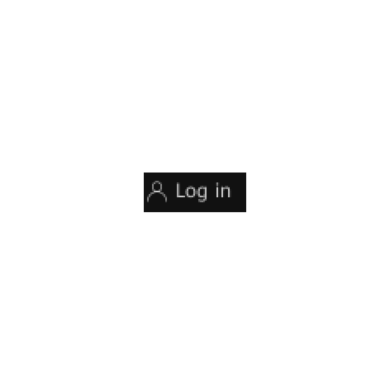


Top predictions:

    Login Button: 85.45%
    Close Button: 4.25%
   Toggle Button: 2.39%
   Search Button: 1.03%
    Allow Button: 0.63%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0K5vChdtVKbfQFEx-bulkfollows_ss-57338.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0K5vChdtVKbfQFEx-bulkfollows_ss-57338.txt


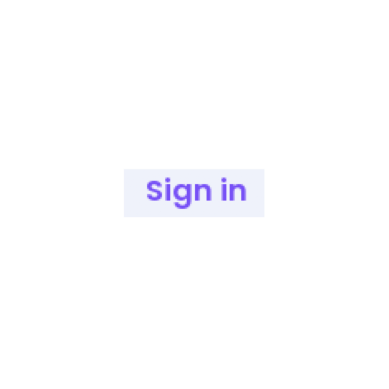


Top predictions:

    Login Button: 43.92%
   Submit Button: 12.01%
 Email Input Box: 8.65%
   Click Captcha: 6.04%
    Text Captcha: 5.33%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0K5vChdtVKbfQFEx-bulkfollows_ss-57345.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0K5vChdtVKbfQFEx-bulkfollows_ss-57345.txt


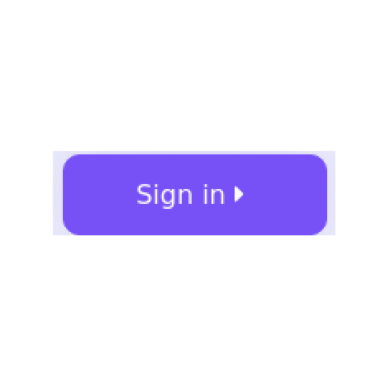


Top predictions:

    Login Button: 71.58%
   Submit Button: 9.10%
   Accept Button: 2.53%
    Text Captcha: 2.30%
   Click Captcha: 2.06%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0LPkJ8LMFNIOzx3U-benjaminfedwards_ss-29638.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0LPkJ8LMFNIOzx3U-benjaminfedwards_ss-29638.txt


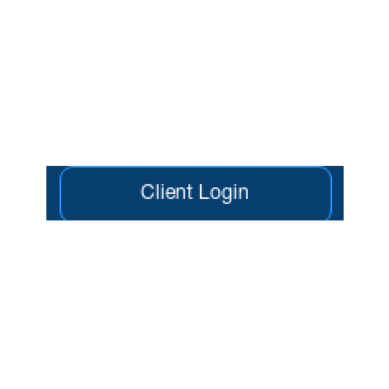


Top predictions:

    Login Button: 88.96%
Password Input Box: 1.76%
    Close Button: 1.68%
Not Webpage Element: 1.37%
   Toggle Button: 1.12%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0Ley5ii5QXMlYF60-technet_ss-90153.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0Ley5ii5QXMlYF60-technet_ss-90153.txt


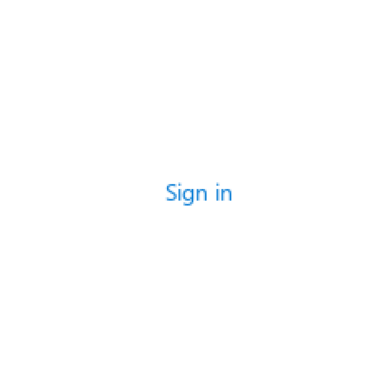


Top predictions:

    Login Button: 43.21%
 Email Input Box: 8.51%
   Submit Button: 5.58%
   Click Captcha: 4.28%
   Accept Button: 3.96%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0NwfncwTnLWZkxNX-radiomirchi_ss-71968.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0NwfncwTnLWZkxNX-radiomirchi_ss-71968.txt


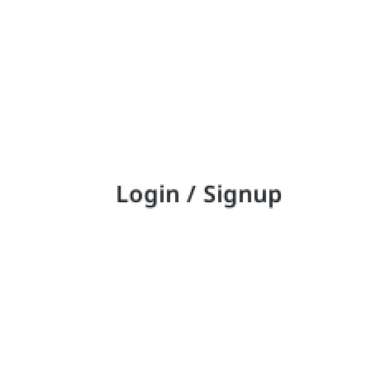


Top predictions:

    Login Button: 97.90%
Password Input Box: 0.41%
        Checkbox: 0.22%
   Click Captcha: 0.18%
Not Webpage Element: 0.14%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0aSvLeN7vveEJRok-projectorbit_ss-98038.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0aSvLeN7vveEJRok-projectorbit_ss-98038.txt


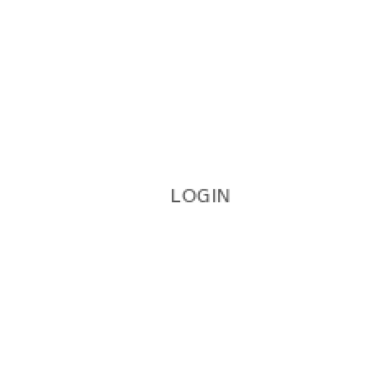


Top predictions:

    Login Button: 98.78%
    Close Button: 0.29%
Not Webpage Element: 0.17%
   Toggle Button: 0.13%
   Update Button: 0.08%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0aT6ZBE3yco6RgfF-boldgrid_ss-54802.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0aT6ZBE3yco6RgfF-boldgrid_ss-54802.txt


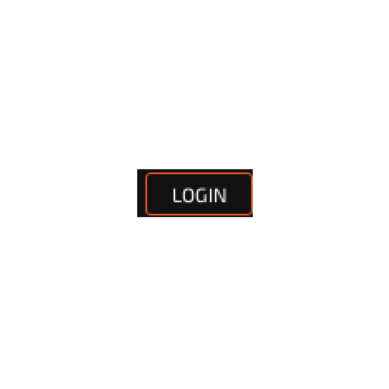


Top predictions:

    Login Button: 98.24%
    Close Button: 0.54%
   Accept Button: 0.18%
   Search Button: 0.15%
   Update Button: 0.11%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0aXzFjMIBidKVi47-albacars_ss-85748.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0aXzFjMIBidKVi47-albacars_ss-85748.txt


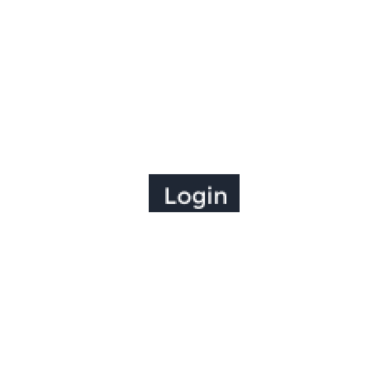


Top predictions:

    Login Button: 96.88%
    Close Button: 0.84%
   Toggle Button: 0.39%
Password Input Box: 0.27%
   Accept Button: 0.21%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0bTOTOKumNsESNVa-behance_ss-16520.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0bTOTOKumNsESNVa-behance_ss-16520.txt


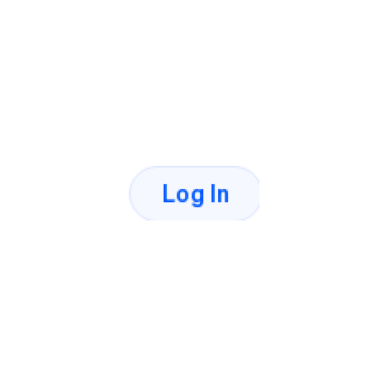


Top predictions:

    Login Button: 91.41%
    Close Button: 1.13%
Password Input Box: 1.08%
   Toggle Button: 1.02%
   Search Button: 0.74%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0cuOVb3iQW1RCOw6-atlassian_ss-2542.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0cuOVb3iQW1RCOw6-atlassian_ss-2542.txt


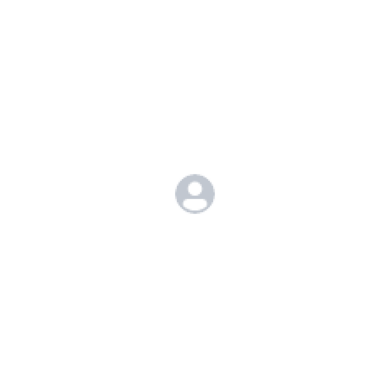


Top predictions:

    Login Button: 16.86%
   Toggle Button: 13.33%
   Update Button: 12.72%
        Checkbox: 9.16%
    Close Button: 7.36%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0cuOVb3iQW1RCOw6-atlassian_ss-2552.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0cuOVb3iQW1RCOw6-atlassian_ss-2552.txt


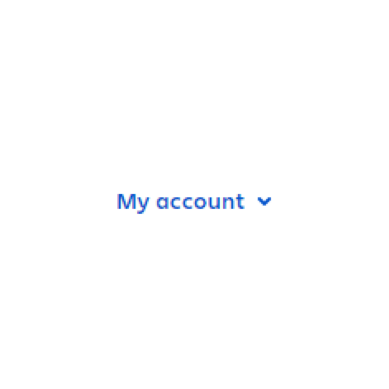


Top predictions:

    Login Button: 28.17%
 Email Input Box: 11.56%
   Accept Button: 9.44%
        Checkbox: 7.82%
   Search Button: 5.13%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0cunfr2TolrfBcE4-emcore_ss-50197.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0cunfr2TolrfBcE4-emcore_ss-50197.txt


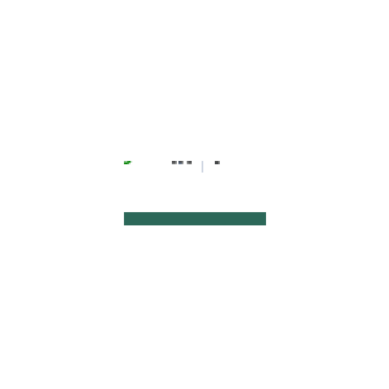


Top predictions:

Not Webpage Element: 21.90%
    Login Button: 13.07%
        Checkbox: 6.78%
General Input Box: 6.47%
   Toggle Button: 5.36%

Label: Not Webpage Element

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0dKhs10w0wb3Es7P-3dbinpacking_ss-62031.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0dKhs10w0wb3Es7P-3dbinpacking_ss-62031.txt


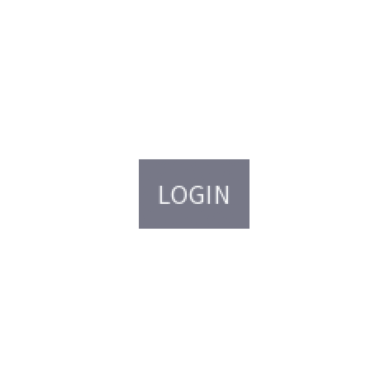


Top predictions:

    Login Button: 98.44%
    Close Button: 0.61%
   Toggle Button: 0.21%
   Accept Button: 0.16%
    Allow Button: 0.09%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0fOtTqW4ZNUX0lmU-domainecarneros_ss-134784.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0fOtTqW4ZNUX0lmU-domainecarneros_ss-134784.txt


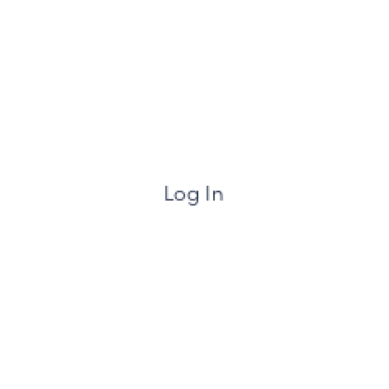


Top predictions:

    Login Button: 90.82%
    Close Button: 1.94%
   Toggle Button: 1.66%
Not Webpage Element: 0.86%
   Update Button: 0.70%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0jPnnkvk7WFEDTwq-myproviderlink_ss-134918.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0jPnnkvk7WFEDTwq-myproviderlink_ss-134918.txt


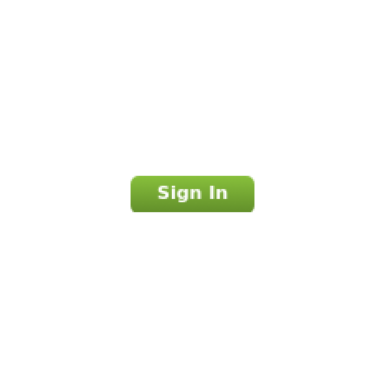


Top predictions:

    Login Button: 66.55%
   Image Captcha: 4.75%
   Click Captcha: 4.39%
    Text Captcha: 3.64%
   Accept Button: 2.92%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41692.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41692.txt


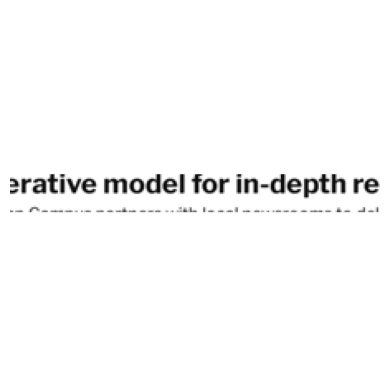


Top predictions:

Not Webpage Element: 30.13%
   Image Captcha: 23.10%
    Text Captcha: 8.50%
General Input Box: 6.51%
        Checkbox: 6.41%

Label: Not Webpage Element

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41693.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41693.txt


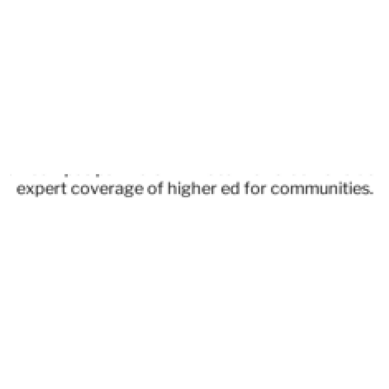


Top predictions:

Not Webpage Element: 42.24%
        Checkbox: 18.74%
   Update Button: 6.18%
           Video: 4.31%
    Text Captcha: 3.75%

Label: Not Webpage Element

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41694.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41694.txt


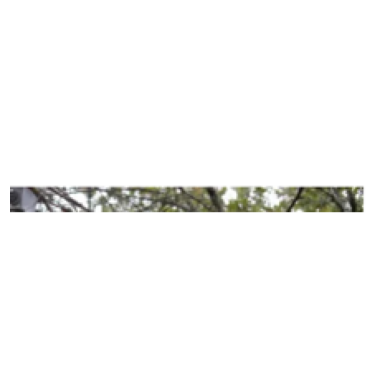


Top predictions:

   Image Captcha: 21.04%
    Text Captcha: 11.44%
   Search Button: 7.50%
   Click Captcha: 7.39%
Not Webpage Element: 7.16%

Label: Image Captcha

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41695.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0k6ckHzDS5ZsaVal-opencampusmedia_ss-41695.txt


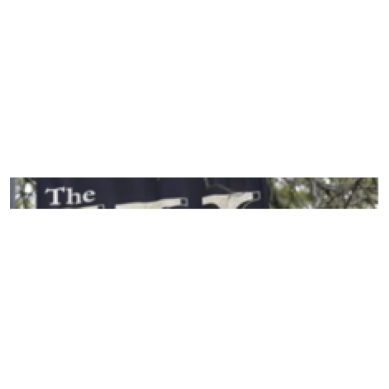


Top predictions:

   Image Captcha: 27.37%
    Text Captcha: 26.12%
   Click Captcha: 8.61%
           Video: 7.97%
    Close Button: 2.98%

Label: Image Captcha

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0ljqTqEm39x6Zpoj-resetera_ss-5249.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0ljqTqEm39x6Zpoj-resetera_ss-5249.txt


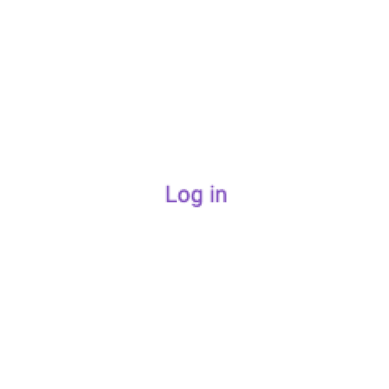


Top predictions:

    Login Button: 87.79%
    Close Button: 2.53%
   Toggle Button: 2.06%
   Submit Button: 1.16%
   Search Button: 0.85%

Label: Login Button

##################################################

/home/pyt_user/pp/pytorch/clip/test_img_text/0ljqTqEm39x6Zpoj-resetera_ss-5250.png
/home/pyt_user/pp/pytorch/clip/test_img_text/0ljqTqEm39x6Zpoj-resetera_ss-5250.txt


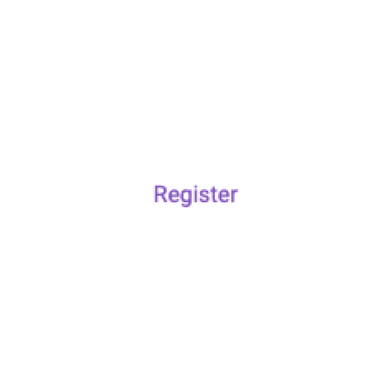


Top predictions:

    Login Button: 43.68%
   Image Captcha: 9.90%
   Submit Button: 8.34%
        Checkbox: 6.49%
   Click Captcha: 4.68%

Label: Login Button

##################################################



In [20]:
# Example data (replace this with actual data loading logic)

img_fn_list = sorted([fn for fn in os.listdir(doi) if fn.endswith('.png')])
txt_fn_list = sorted([fn for fn in os.listdir(doi) if fn.endswith('.txt')])

labels_tensor = torch.cat([clip.tokenize(txt.lower()) for txt in labels]).to(device)

for i in range(len(img_fn_list)):
    
    image_path = os.path.join(doi, img_fn_list[i])
    txt_path = os.path.join(doi, txt_fn_list[i])
    print(image_path)
    print(txt_path)
    
    # Process the image
    image_tensor = preprocess(Image.open(image_path))
    context_tensor = clip.tokenize(txt_path)
        
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

    # Run inference
    best_label = run_clip_inference(image_tensor, context_tensor, labels_tensor)

    print()
    print(f"Label: {best_label}")
    
    print()
    print("##################################################")
    print()
